# What is PyTorch?

PyTorch (https://pytorch.org/) is a machine learning framework for training deep neural networks. Neural networks are represented as computational graphs i.e. graphs of nodes and weighted edges where each node represents some mathematical function. As we saw in the lectures, a central task during training is to compute the derivatives of the loss function with respect to all the weights of the edges. These derivatives are then used for gradient descent.

PyTorch enables the efficient computation of these derivatives from the structure of the graph using SIMD operations on GPUs (although a CPU alone can be used too).

The goal of this notebook is to introduce the basics of PyTorch. Another similar framework is TensorFlow (https://www.tensorflow.org/) which we won't cover here.

In [43]:
import networkx as nx

# Computational Graph - Automatic Differentiation

In [5]:
import torch
import numpy as np

### Example 1

In [20]:
x = torch.tensor([3.], requires_grad=True, dtype=torch.float32)
y = torch.tensor([4.], requires_grad=True, dtype=torch.float32)

z = x*y

### Questions:

What should z be? (12)

What is $\frac{\partial z}{\partial x}$? What is $\frac{\partial z}{\partial y}$?

$$\frac{\partial z}{\partial x} = y = 4$$

$$\frac{\partial z}{\partial y} = x = 3$$

In [21]:
print(f'Derivative of z with respect to x: {x.grad}')
print(f'Derivative of z with respect to y: {y.grad}')

Derivative of z with respect to x: None
Derivative of z with respect to y: None


In [22]:
print('Compute derivatives...')
z.backward()

Compute derivatives...


In [23]:
print(f'Derivative of z with respect to x: {x.grad}')
print(f'Derivative of z with respect to y: {y.grad}')

Derivative of z with respect to x: tensor([4.])
Derivative of z with respect to y: tensor([3.])


### Example 2

In [38]:
a = torch.tensor([2], requires_grad=True, dtype=torch.float32)
b = torch.tensor([3], requires_grad=True, dtype=torch.float32)
c = torch.tensor([4], requires_grad=True, dtype=torch.float32)

In [39]:
d = (a+b)
d.requires_grad_()

e = d*c
e.requires_grad_()

tensor([20.], grad_fn=<MulBackward0>)

Use chain rule

$$\frac{\partial e}{\partial a} = \frac{\partial e}{\partial d} \frac{\partial d}{\partial a} + \frac{\partial e}{\partial c} \frac{\partial c}{\partial a}$$

More succinctly, define $$\partial_{ea} \equiv \frac{\partial e}{\partial a}$$

Then:

$$\frac{\partial e}{\partial a} = \partial_{ea} = \partial_{ed} \partial_{da} + \partial_{ec} \partial_{ca}$$

$$\frac{\partial e}{\partial a} = \partial_{ea} = \underbrace{\partial_{ed}}_{c} \underbrace{\partial_{da}}_{1} + \underbrace{\partial_{ec}}_{d} \underbrace{\partial_{ca}}_{0} = c$$

and, 

$$\partial_{eb} = c$$

and 

$$\partial_{ed} = c$$

and 

$$\partial_{ec} = d$$

In [40]:
e.backward()

In [41]:
print(a.grad)
print(b.grad)
print(c.grad)
print(d.grad)

tensor([4.])
tensor([4.])
tensor([5.])
None


# Building my own toy neural network

/home/sanjay/anaconda3/envs/fastai2/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/sanjay/anaconda3/envs/fastai2/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


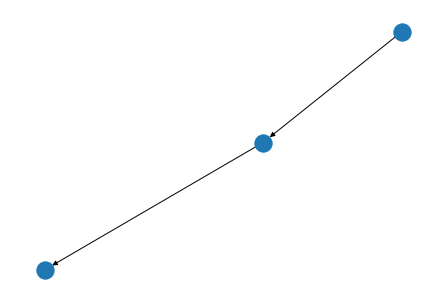

In [55]:
#nn diagram

G = nx.DiGraph()

G.add_node(1)
G.add_node(2)
G.add_node(3)

G.add_edge(1,2)
G.add_edge(2,3)
nx.draw_spring(G)

In [56]:
torch.

AttributeError: module 'torch.utils' has no attribute 'dataset'

# Full neural network

In [ ]:
import torch.nn as nn

class MyNet(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        
        
        